In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.shape

(600, 6)

In [19]:
data_2 = data.copy()

In [20]:
data_2=pd.get_dummies(data=data_2,columns=['Undergrad','Marital.Status','Urban'])

In [21]:
data_2

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [25]:
X = data_2.iloc[:,1:]
Y = data_2.iloc[:,0]

In [26]:
Y[Y<30000]=0

In [27]:
Y[Y>=30000]=1

In [28]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=40)

## Model Building Using Entropy Criteria

In [32]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(362.7, 636.012, 'X[0] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]'),
 Text(226.6875, 494.676, 'X[1] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [13, 93]'),
 Text(181.35, 353.34, 'X[0] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [13, 68]'),
 Text(90.675, 212.00400000000002, 'X[8] <= 0.5\nentropy = 0.811\nsamples = 36\nvalue = [9, 27]'),
 Text(45.3375, 70.668, 'entropy = 0.964\nsamples = 18\nvalue = [7, 11]'),
 Text(136.0125, 70.668, 'entropy = 0.503\nsamples = 18\nvalue = [2, 16]'),
 Text(272.025, 212.00400000000002, 'X[8] <= 0.5\nentropy = 0.433\nsamples = 45\nvalue = [4, 41]'),
 Text(226.6875, 70.668, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(317.3625, 70.668, 'entropy = 0.65\nsamples = 24\nvalue = [4, 20]'),
 Text(272.025, 353.34, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(498.7125, 494.676, 'X[0] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [83, 291]'),
 Text(453.375, 353.34, 'entropy = 0.0\nsamples = 2\nvalue = [2,

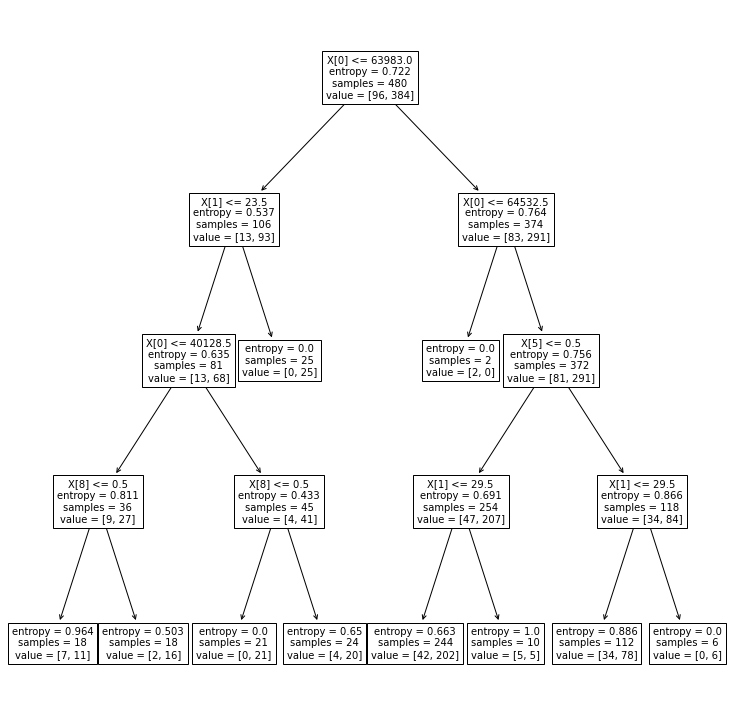

In [33]:
plt.figure(figsize=(13 , 13 ))
tree.plot_tree(model,fontsize=10)

In [34]:
Y_train.value_counts()

1    384
0     96
Name: Taxable.Income, dtype: int64

In [35]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

1    118
0      2
dtype: int64

In [36]:
pd.crosstab(Y_test,preds)

col_0,0,1
Taxable.Income,,
0,1,27
1,1,91


In [37]:
# Accuracy
np.mean(preds==Y_test)

0.7666666666666667

## Decision Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=1)

In [40]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [41]:
# Accuracy
model.score(X_test,Y_test)

0.797979797979798